In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline

In [2]:
df = pandas.read_csv('bg_data_mpi.csv')
print(df.columns)
print(df.shape)

Index(['n_threads', 'height', 'width', 'time', 'file', 'rang'], dtype='object')
(107, 6)


In [3]:
groups = df.groupby(['file', 'n_threads'], as_index=False)

In [4]:
avg = groups.mean()
avg.head()

file  n_threads  height  width       time  rang
0  data/bigdata/horiz789.txt          1    1000   5000  60.747100   789
1  data/bigdata/horiz789.txt          2    1000   5000  57.539467   789
2  data/bigdata/horiz789.txt          4    1000   5000  35.220700   789
3  data/bigdata/horiz789.txt          8    1000   5000  18.517200   789
4  data/bigdata/horiz789.txt         16    1000   5000  15.517267   789

In [6]:
avg.rang.value_counts()

789     12
3000     6
1000     6
4000     6
2000     6
Name: rang, dtype: int64

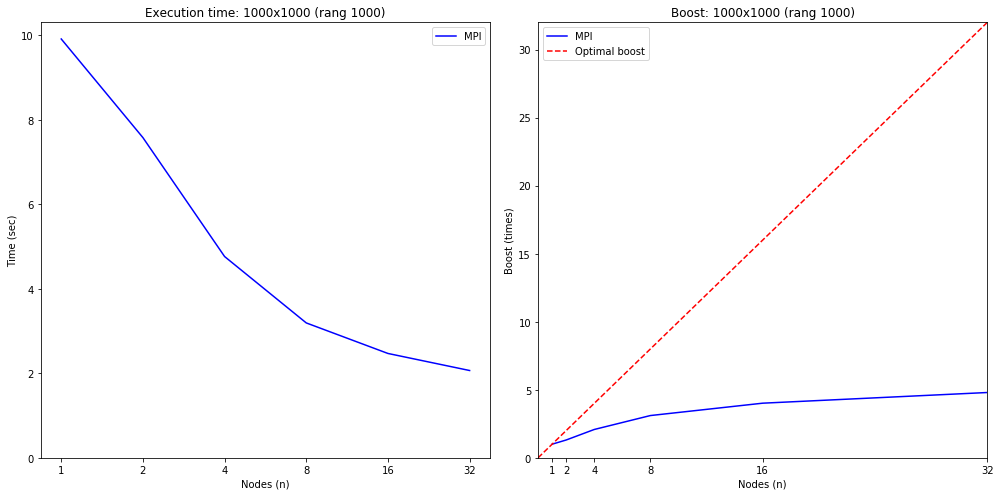

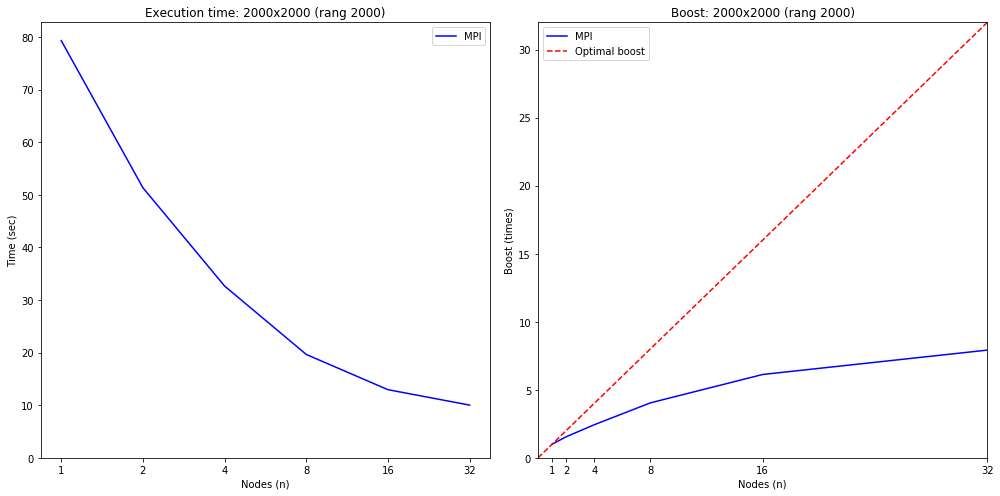

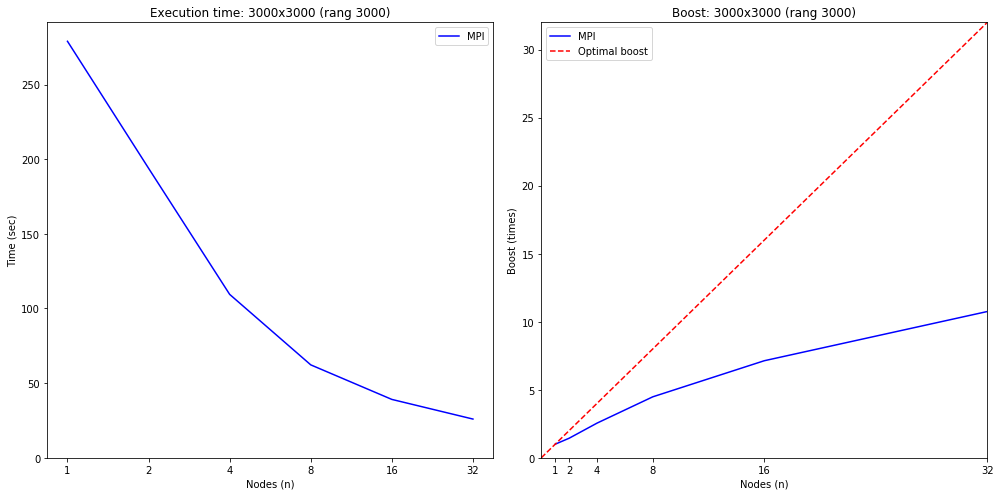

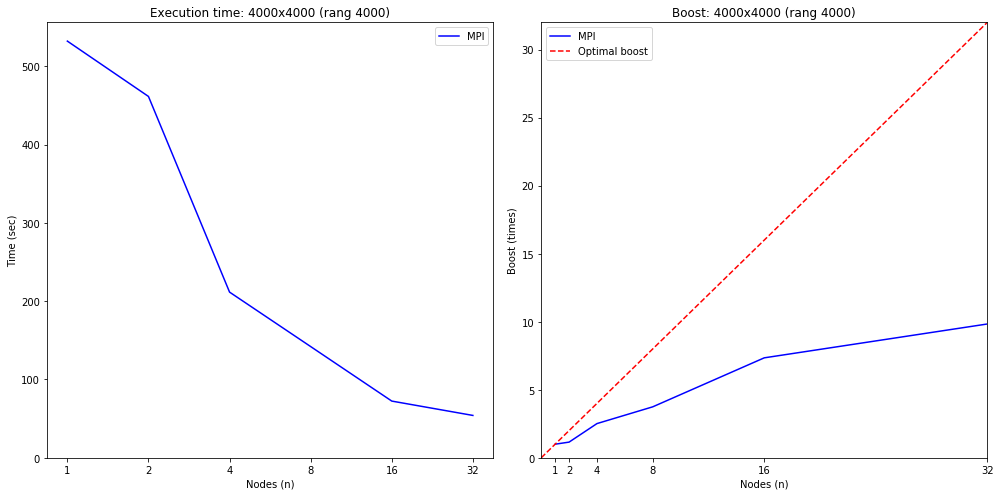

In [28]:
n_threads = [1, 2, 4, 8, 16, 32]
rangs = ['1000', '2000', '3000', '4000']
groups = avg.groupby('file')

for r in rangs:
    fig, axs = plt.subplots(ncols=2, figsize=(14, 7))
    
    group = groups.get_group("data/bigdata/rang{}.txt".format(r))
    by_thread = group.set_index('n_threads')
    times = [by_thread.loc[n].time for n in n_threads]  # for each in n_threads 
    no_acc = by_thread.loc[1]
        
    axs[0].set_title('Execution time: {}x{} (rang {})'.format(no_acc.height, no_acc.width, no_acc.rang))
    axs[1].set_title('Boost: {}x{} (rang {})'.format(no_acc.height, no_acc.width, no_acc.rang))
    axs[0].set_ylabel('Time (sec)')
    axs[1].set_ylabel('Boost (times)')
    axs[0].plot(n_threads, times, label='MPI', color='blue')
    axs[1].plot(n_threads, [times[0] / t for t in times], label='MPI', color='blue')
    
    axs[0].set_xscale('log', basex=2)
    axs[1].plot([0, n_threads[-1]], [0, n_threads[-1]], label='Optimal boost', color='red', linestyle='dashed')
    axs[1].set_ylim(ymin=0, ymax=n_threads[-1])
    axs[1].set_xlim(xmin=0, xmax=n_threads[-1])
    
    for i in range(2):
        axs[i].set_xticks(n_threads)
        axs[i].set_xlabel('Nodes (n)')
        axs[i].xaxis.set_major_formatter(StrMethodFormatter("{x:.0f}"))
        axs[i].set_ylim(ymin=0)
        axs[i].legend()
    
    fig.tight_layout()
    fig.savefig("images/rang{}_mpi.png".format(r))
    plt.show()

In [16]:
# for r in rangs:
#     fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
    
#     for i in range(2):
#         group = groups.get_group("data/big/rang{}{}.txt".format(r, 'h' if i else 'v'))
#         by_thread = group.set_index('n_threads')
#         no_acc = by_thread.loc[-1]
#         times = [no_acc.time / by_thread.loc[n].time for n in n_threads]  # for each in n_threads 

#         axs[i].set_title('{}x{} (rang {})'.format(no_acc.height, no_acc.width, no_acc.rang))
#         axs[i].set_xticks(n_threads)
#         axs[i].set_xlabel('Threads (n)')
#         axs[i].set_xscale('log', basex=2)
#         axs[i].xaxis.set_major_formatter(StrMethodFormatter("{x:.0f}"))
#         axs[i].set_ylabel('Boost (times)')
#         axs[i].plot(n_threads, times, label='OpenMP', color='blue')
#         axs[i].set_ylim(ymin=0)
#         axs[i].legend()
#     fig.tight_layout()
#     fig.savefig("images/boost_rang{}.png".format(r))
#     plt.show()

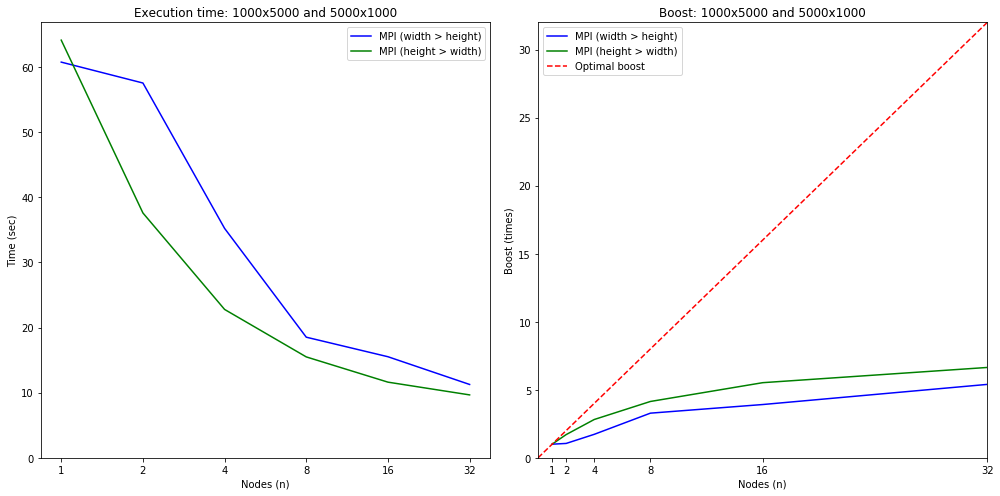

In [31]:
n_threads = [1, 2, 4, 8, 16, 32]
groups = avg.groupby('file')

group1 = groups.get_group("data/bigdata/horiz789.txt")
by_thread1 = group1.set_index('n_threads')
times1 = [by_thread1.loc[n].time for n in n_threads]  # for each in n_threads 
no_acc1 = by_thread1.loc[1]

group2 = groups.get_group("data/bigdata/verti789.txt")
by_thread2 = group2.set_index('n_threads')
times2 = [by_thread2.loc[n].time for n in n_threads]  # for each in n_threads 
no_acc2 = by_thread2.loc[1]

fig, axs = plt.subplots(ncols=2, figsize=(14, 7))
axs[0].set_title('Execution time: 1000x5000 and 5000x1000')
axs[0].plot(n_threads, times1, label='MPI (width > height)', color='blue')
axs[0].plot(n_threads, times2, label='MPI (height > width)', color='green')
axs[0].set_xscale('log', basex=2)
axs[0].set_ylabel('Time (sec)')

axs[1].set_title('Boost: 1000x5000 and 5000x1000')
axs[1].plot(n_threads, [times1[0] / t for t in times1], label='MPI (width > height)', color='blue')
axs[1].plot(n_threads, [times2[0] / t for t in times2], label='MPI (height > width)', color='green')
axs[1].plot([0, n_threads[-1]], [0, n_threads[-1]], label='Optimal boost', color='red', linestyle='dashed')
axs[1].set_ylabel('Boost (times)')
axs[1].set_ylim(ymin=0, ymax=n_threads[-1])
axs[1].set_xlim(xmin=0, xmax=n_threads[-1])

for i in range(2):
    axs[i].set_xticks(n_threads)
    axs[i].set_xlabel('Nodes (n)')
    axs[i].xaxis.set_major_formatter(StrMethodFormatter("{x:.0f}"))
    axs[i].set_ylim(ymin=0)
    axs[i].legend()

fig.tight_layout()
fig.savefig("images/rotated_mpi.png")
plt.show()

In [21]:
square_rangs = ['1000', '2000', '3000', '4000']
# fig, axs = plt.subplots(ncols=len(square_rangs), figsize=(25, 5))

# for i, r in enumerate(square_rangs):
#     group = groups.get_group("data/big/rang{}.txt".format(r))
#     by_thread = group.set_index('n_threads')
#     no_acc = by_thread.loc[-1]
#     times = [no_acc.time / by_thread.loc[n].time for n in n_threads]  # for each in n_threads 

#     axs[i].set_title('{}x{} (rang {})'.format(no_acc.height, no_acc.width, no_acc.rang))
#     axs[i].set_xticks(n_threads)
#     axs[i].set_xlabel('Threads (n)')
#     axs[i].set_xscale('log', basex=2)
#     axs[i].xaxis.set_major_formatter(StrMethodFormatter("{x:.0f}"))
#     axs[i].set_ylabel('Boost (times)')
#     axs[i].plot(n_threads, times, label='OpenMP', color='blue')
#     axs[i].set_ylim(ymin=0)
#     axs[i].legend()
# fig.tight_layout()
# fig.savefig("images/boost_square_rangs.png")
# plt.show()

In [22]:
from mpl_toolkits.mplot3d import Axes3D

In [23]:
rangs_axis = [int(r) for r in square_rangs]
X, Y = np.meshgrid(n_threads, rangs_axis)
Z = []
for r in square_rangs:
    group = groups.get_group("data/bigdata/rang{}.txt".format(r))
    by_thread = group.set_index('n_threads')
    for n in n_threads:
        Z.append(by_thread.loc[n].time)
Z = np.array(Z).reshape(X.shape)

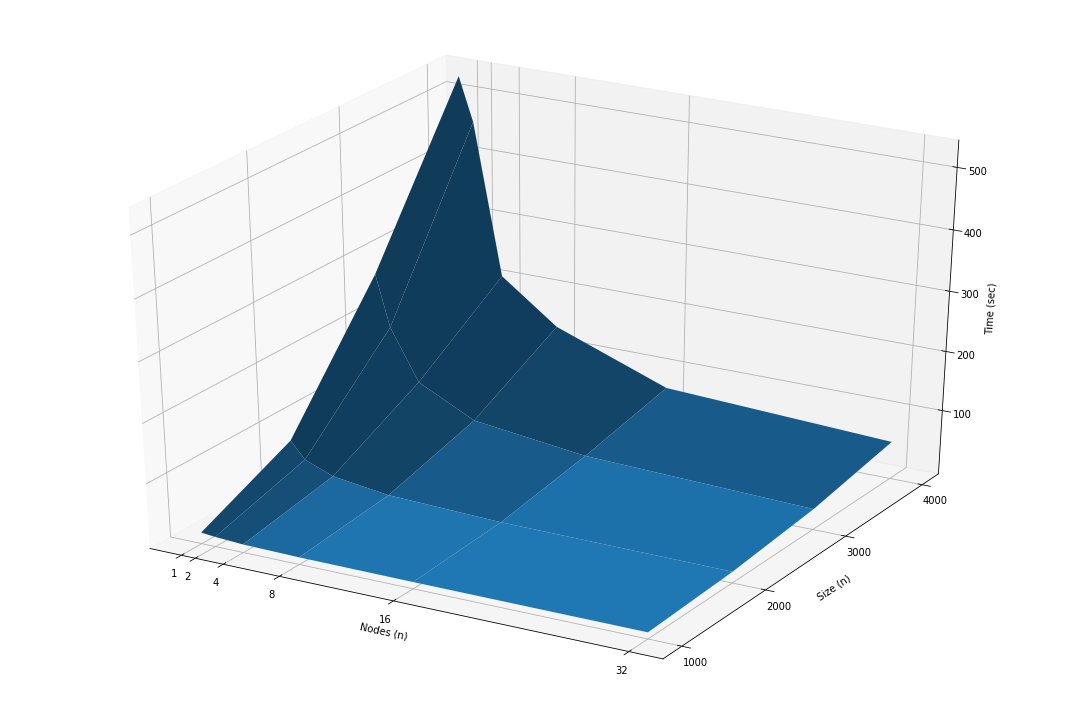

In [24]:
fig3d = plt.figure(figsize=(15, 10))
ax3d = fig3d.add_subplot(111, projection='3d')
ax3d.set_xlabel('Nodes (n)')
ax3d.set_xticks(n_threads)
ax3d.set_ylabel('Size (n)')
ax3d.set_yticks(rangs_axis)
ax3d.set_zlabel('Time (sec)')
ax3d.plot_surface(X, Y, Z)
fig3d.tight_layout()
fig3d.savefig('images/3d_mpi.png')
plt.show()

In [27]:
print("|height|width|rang|1|2|4|8|16|32|")
for name, group in avg.groupby('file'):
    by_thread = group.set_index('n_threads')
    row = [by_thread.loc[1].height, by_thread.loc[1].width, by_thread.loc[1].rang]
    for i in [2 ** k for k in range(6)]:
        row.append(by_thread.loc[i].time)
    print("|{}|".format("|".join(map(str, row[:3])) + "|" + "|".join(map("{:.3f}".format, row[3:]))))

|height|width|rang|1|2|4|8|16|32|
|1000|5000|789|60.747|57.539|35.221|18.517|15.517|11.260|
|1000|1000|1000|9.913|7.579|4.764|3.192|2.470|2.066|
|2000|2000|2000|79.293|51.327|32.649|19.643|12.949|10.019|
|3000|3000|3000|278.955|193.911|109.449|62.242|39.101|25.947|
|4000|4000|4000|532.062|461.421|211.557|142.029|72.422|54.104|
|5000|1000|789|64.122|37.589|22.779|15.490|11.615|9.657|
